In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
path_to_csv = '/content/gdrive/My Drive/diabetes(1).csv'

In [20]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

# load dataset
from sklearn.model_selection import train_test_split
import numpy as np

dataset = pd.read_csv(path_to_csv, header=None).values

X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.1, random_state=30)

np.random.seed(155)

my_first_nn = Sequential()
my_first_nn.add(Dense(16, activation='relu', input_shape=(8,)))
my_first_nn.add(Dense(8, activation='relu'))
my_first_nn.add(Dense(64, activation='relu'))
my_first_nn.add(Dense(1, activation='sigmoid'))

my_first_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
my_first_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

loss, accuracy = my_first_nn.evaluate(X_test, Y_test)
print('Loss:', loss)
print('Accuracy:', accuracy)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.3501 - accuracy: 0.6483
Epoch 2/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.6498
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.3463 - accuracy: 0.6483
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2941 - accuracy: 0.6339
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.6469
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2421 - accuracy: 0.6758
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.6599
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2495 - accuracy: 0.6425
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2498 - accuracy: 0.6643
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2340 - accuracy: 0.6585
Epoch 11/

In [19]:
import keras
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
import numpy as np

# load dataset
dataset = pd.read_csv(path_to_csv, header=None).values
#split the dataset with training and testing
X_train, X_test, Y_train, Y_test = train_test_split(dataset[:,0:8], dataset[:,8], test_size=0.1, random_state=30)

np.random.seed(155)

my_first_nn = Sequential()
my_first_nn.add(Dense(64, activation='relu', input_shape=(8,))) #   Hidden Layer
my_first_nn.add(Dense(8, activation='relu'))  # hidden layer

my_first_nn.add(Dense(64, activation='relu'))  #hidden layer

my_first_nn.add(Dense(1, activation='sigmoid'))

my_first_nn.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
my_first_nn.fit(X_train, Y_train, epochs=100, initial_epoch=0)

loss, accuracy = my_first_nn.evaluate(X_test, Y_test)
print('Loss:', loss)
print('Accuracy:',accuracy)

Epoch 1/100
22/22 [==============================] - 1s 2ms/step - loss: 0.4797 - accuracy: 0.4776
Epoch 2/100
22/22 [==============================] - 0s 3ms/step - loss: 0.3102 - accuracy: 0.6599
Epoch 3/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2983 - accuracy: 0.6483
Epoch 4/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2344 - accuracy: 0.6498
Epoch 5/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2130 - accuracy: 0.6773
Epoch 6/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.7004
Epoch 7/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2110 - accuracy: 0.6860
Epoch 8/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2145 - accuracy: 0.6845
Epoch 9/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.6773
Epoch 10/100
22/22 [==============================] - 0s 2ms/step - loss: 0.2064 - accuracy: 0.6831
Epoch 11/

In [16]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')
#scale data
train_data /=255.0
test_data /=255.0
#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))  # Hidden layer
model.add(Dense(512, activation='relu'))  #Hidden layer
model.add(Dense(30, activation='sigmoid')) #Hidden layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

11490434/11490434 [==============================] - 0s 0us/step
(28, 28)
784
Epoch 1/10
235/235 [==============================] - 8s 32ms/step - loss: 0.6052 - accuracy: 0.8705 - val_loss: 0.2458 - val_accuracy: 0.9451
Epoch 2/10
235/235 [==============================] - 5s 23ms/step - loss: 0.1753 - accuracy: 0.9576 - val_loss: 0.1381 - val_accuracy: 0.9643
Epoch 3/10
235/235 [==============================] - 6s 25ms/step - loss: 0.0993 - accuracy: 0.9734 - val_loss: 0.1061 - val_accuracy: 0.9719
Epoch 4/10
235/235 [==============================] - 7s 30ms/step - loss: 0.0685 - accuracy: 0.9814 - val_loss: 0.0850 - val_accuracy: 0.9753
Epoch 5/10
235/235 [==============================] - 5s 23ms/step - loss: 0.0488 - accuracy: 0.9866 - val_loss: 0.0737 - val_accuracy: 0.9781
Epoch 6/10
235/235 [==============================] - 8s 32ms/step - loss: 0.0367 - accuracy: 0.9901 - val_loss: 0.0662 - val_accuracy: 0.9798
Epoch 7/10
235/235 [==============================] - 6s 24ms/st

In [17]:
from keras import Sequential
from keras.datasets import mnist
import numpy as np
from keras.layers import Dense
from keras.utils import to_categorical

(train_images,train_labels),(test_images, test_labels) = mnist.load_data()

print(train_images.shape[1:])
#process the data
#1. convert each image of shape 28*28 to 784 dimensional which will be fed to the network as a single feature
dimData = np.prod(train_images.shape[1:])
print(dimData)
train_data = train_images.reshape(train_images.shape[0],dimData)
test_data = test_images.reshape(test_images.shape[0],dimData)

#convert data to float and scale values between 0 and 1
train_data = train_data.astype('float')
test_data = test_data.astype('float')

#change the labels frominteger to one-hot encoding. to_categorical is doing the same thing as LabelEncoder()
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#creating network
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(dimData,)))  # Hidden layer
model.add(Dense(512, activation='relu'))  #Hidden layer
model.add(Dense(30, activation='sigmoid')) #Hidden layer
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, train_labels_one_hot, batch_size=256, epochs=10, verbose=1,
                   validation_data=(test_data, test_labels_one_hot))

(28, 28)
784
Epoch 1/10
235/235 [==============================] - 6s 24ms/step - loss: 1.1260 - accuracy: 0.7240 - val_loss: 0.4883 - val_accuracy: 0.9123
Epoch 2/10
235/235 [==============================] - 8s 32ms/step - loss: 0.3563 - accuracy: 0.9228 - val_loss: 0.2467 - val_accuracy: 0.9404
Epoch 3/10
235/235 [==============================] - 6s 24ms/step - loss: 0.2392 - accuracy: 0.9391 - val_loss: 0.2096 - val_accuracy: 0.9464
Epoch 4/10
235/235 [==============================] - 8s 32ms/step - loss: 0.2051 - accuracy: 0.9461 - val_loss: 0.2210 - val_accuracy: 0.9383
Epoch 5/10
235/235 [==============================] - 7s 31ms/step - loss: 0.1900 - accuracy: 0.9487 - val_loss: 0.1688 - val_accuracy: 0.9546
Epoch 6/10
235/235 [==============================] - 9s 37ms/step - loss: 0.1761 - accuracy: 0.9529 - val_loss: 0.1750 - val_accuracy: 0.9554
Epoch 7/10
235/235 [==============================] - 11s 45ms/step - loss: 0.1759 - accuracy: 0.9533 - val_loss: 0.1764 - val_ac

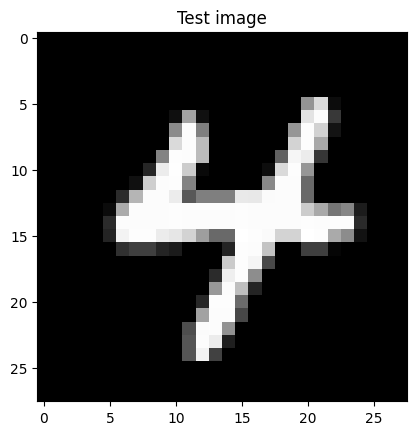

1/1 [==============================] - 0s 157ms/step
Predicted class: 4


In [18]:
import matplotlib.pyplot as plt

# select a random image from the test data
test_image_index = np.random.randint(0, len(test_data))
test_image = test_data[test_image_index]

# reshape the image to its original shape
test_image = test_image.reshape((28, 28))

# plot the image
plt.imshow(test_image, cmap='gray')
plt.title('Test image')
plt.show()
# make a prediction on the test image
prediction = model.predict(test_image.reshape((1, dimData)))

# get the predicted class label
predicted_class = np.argmax(prediction)

# print the predicted class label
print('Predicted class:', predicted_class)

import matplotlib.pyplot as plt

# select a random image from the test data
test_image_index = np.random.randint(0, len(test_data))
test_image = test_data[test_image_index]

# reshape the image to its original shape
test_image = test_image.reshape((28, 28))


